<h1 style="text-align:center;font-size:30px;" > Demand Forecasting for a Store </h1>

<h2> Problem Statement

We have a meal delivery company (client) that operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers.

We are going to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of the majority of raw materials is done on weekly basis and since the raw material is perishable, procurement planning is of utmost importance.

Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful.

We are given with the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:

• Historical data of demand for a product-center combination (Weeks: 1 to 145)

• Product (Meal) features such as category, sub-category, current price, and discount

• Information for fulfillment centers like center area, city information, etc.


<h2> Business/Real world impact of solving this problem

1. Demand forecasting is critical to the future of any business as it helps reduce risks and make the
right call on many fronts.


2. From omnichannel giants to the smallest brick and mortar boutiques, all retailers rely on demand
forecasts to predict their best estimate of how much they will sell. Modern demand forecasting is
a sophisticated statistical analysis that takes into account numerous variables to optimize that
prediction.


3. While some retailers still rely on spreadsheets and manual calculations, such high-powered
statistical analysis is best executed by specialized software designed to process enormous,
retail-scale data sets. The perk of this technique is it transparently shows users what data is
being used to build forecasts and how the forecasts are being calculated. Modern demand
forecasting software automates difficult and time-consuming decisions, using machine learning to
optimize predictions.


4. Though it will never be 100% accurate, forecasting demand can help improve production lead
times, increase operational efficiencies, save money, launch new products, and provide a better
customer experience overall.

<h2>Data overview

    -Source: Kaggle (https://www.kaggle.com/code/kerneler/starter-food-demand-dataset-d213c52f-7/data)
    -Number of variables: 15 
    -Number of observations: 456548
    -Missing cells: 0
    -Duplicate rows: 0
    -Total size of memory: 55.7 MB
    -Numeric variables: 10
    -Categorical variables: 5

<h2>Types of problem

It is a regression problem, for a given meal we need to predict the number of orders in given week.

<h2>Performance metric

The metrics we are going to use is Root Mean Squared Error (RMSE) and Coeffecient of determinant (R_squared value) 

<h2>Train-Test construction

As it is a temporal data, we will be splitting the data by time series split i.e. the data older will be used for training and newer data for validation. 

<h2>Exploratory data analysis

<h3>Importing libraries

We are importing some of the libraries we are going to use in this project.

In [95]:
# Importing useful libraries
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import time
import os
from distfit import distfit
%matplotlib inline 

<h3>Loading data and basic statistics

Loading all the given csv files as train, center and meal. We are merging the center and meal into train to form a dataframe df.

In [96]:
# Path where i have saved the data folder in my computer
os.chdir("D:\AAAAAAA RAJSHREE\DATA SCIENCE\DATASETs\Demand forecasting for a store")
# Reading csv file using pandas
train = pd.read_csv("train.csv")
center = pd.read_csv("fulfilment_center_info.csv")
meal = pd.read_csv("meal_info.csv")
# Merging dataframes using "merge" function
df = train.merge(meal, on="meal_id")
df = df.merge(center, on="center_id")
# Printing df
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [97]:
print("Number of data points:",df.shape[0])
print("Number of features:",df.shape[1])

Number of data points: 456548
Number of features: 15


In [98]:
# Generating descriptive statistics of dataframe.
df.describe(include="all")
# to see summary statistics of all columns of DataFrame regardless of data type

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548,456548,456548.000000,456548.000000,456548,456548.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,4,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beverages,Italian,NaN,NaN,TYPE_A,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127890,122925,NaN,NaN,262881,NaN
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,NaN,NaN,601.553399,56.614566,NaN,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,NaN,NaN,66.195914,17.641306,NaN,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,NaN,NaN,456.000000,23.000000,NaN,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,NaN,NaN,553.000000,34.000000,NaN,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,NaN,NaN,596.000000,56.000000,NaN,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,NaN,NaN,651.000000,77.000000,NaN,4.500000


In [99]:
# Printing a concise summary of DataFrame.
df.info()
# This method prints information about DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [100]:
# Checking if there is any missing values with "isna()" function
df.isna().sum()
# As all the all sum value is 0, there is no missing value

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

<h3>Univariate and Bivariate analysis:

Univariate analysis refers to the analysis done based on one variable while bivariate with two variables.

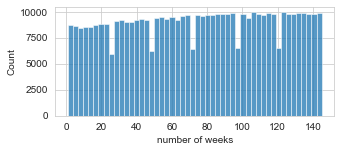

In [101]:
# Setting figure size to be plotted
fig = plt.figure(figsize=(5,2))
# Plotting histogram and kde of feature "num_orders" using seaborn
sb.histplot(df['week'], bins=50, palette="muted", kde=False)
plt.xlabel("number of weeks")
plt.show()

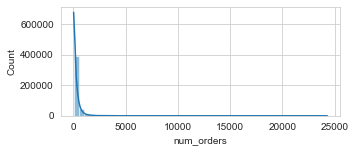

In [102]:
# Setting figure size to be plotted
fig = plt.figure(figsize=(5,2))
# Plotting histogram and kde of feature "num_orders" using seaborn
sb.histplot(df['num_orders'], bins=50, palette="muted", kde=True)
plt.xlabel("num_orders")
plt.show()
# All the data are concentrated near 0.
# num_orders is right skewed.
# As the above graph is not much readable let's plot it again by taking log of num_orders.

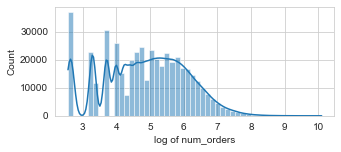

In [103]:
# Setting figure size to be plotted
fig = plt.figure(figsize=(5,2))
# Plotting histogram and kde of feature "num_orders" using seaborn
sb.histplot(np.log(df['num_orders']), bins=50, palette="muted", kde=True)
plt.xlabel("log of num_orders")
plt.show()
# This plot is more clearer multimodal histogram 

In [104]:
'''
# Let's look into what type of distribution is num_orders
# Instantiating distfit
dist = distfit(todf=True)
# Fit an transform num_orders
dist.fit_transform(df["num_orders"])
# Plotting distribution plot
dist.plot()
# num_orders follows exponential distribution
'''

'\n# Let\'s look into what type of distribution is num_orders\n# Instantiating distfit\ndist = distfit(todf=True)\n# Fit an transform num_orders\ndist.fit_transform(df["num_orders"])\n# Plotting distribution plot\ndist.plot()\n# num_orders follows exponential distribution\n'

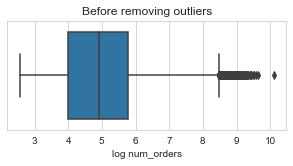

In [105]:
# Setting figure size to be plotted
fig = plt.figure(figsize=(5,2))
# Ploting boxplot for log of num_orders
sb.boxplot(np.log(df["num_orders"]))
plt.title("Before removing outliers")
plt.xlabel("log num_orders")
plt.show()
# Outliers need to be removed

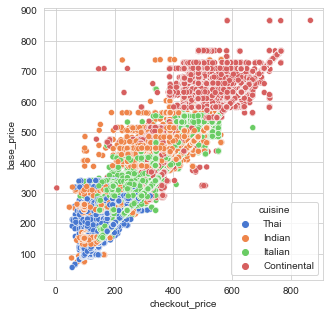

In [106]:
# Setting figure size to be plotted
fig = plt.figure(figsize=(5,5))
#Plotting scatter plot of checkout_price nd base_price with cuisine as hue
sb.scatterplot(x=df["checkout_price"], y=df["base_price"], hue=df["cuisine"], palette="muted")
plt.show()
# base_price and checkout_price are linearly related
# base_price of most of the meals are greater than the checkout_price
# Continental is most expensive of all other cuisines

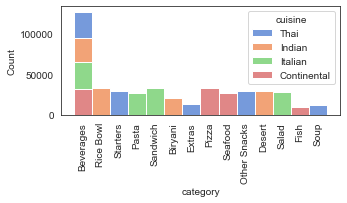

In [107]:
# Setting figure size to be plotted
sb.set_style("white")
fig = plt.figure(figsize=(5,2))
#Plotting histogram and kde of feature "category" color encoded with "cuisine".  
sb.histplot(data=df, x='category', hue="cuisine", multiple = "stack", palette="muted", kde=False,  legend=True)
#Rotating the labels on x-axis with a degree of 30, this is just to make all the labels on the x-axis readable.
plt.xticks(rotation=90)
plt.show()
# Beverages comes under all the cuisines hence it has the highest count of all other meal categories 

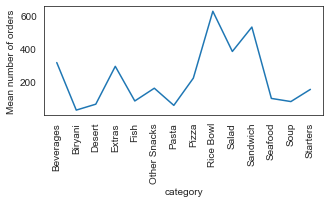

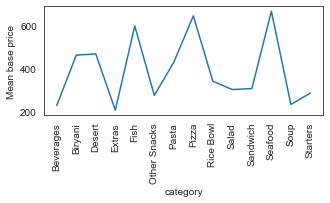

In [108]:
# Forming a sorted list of all meal category

# Setting figure size to be plotted
plt.figure(figsize=(5,2))
cat = sorted(list(df["category"].unique()))
items = cat.__len__()
# Plotting total number of orders for each meal category 
ax = df.groupby(["category"]).num_orders.mean()
ax.plot()
plt.ylabel("Mean number of orders")
plt.xticks(range(items), labels=cat, rotation=90)
plt.show()

plt.figure(figsize=(5,2)) 
cat = sorted(list(df["category"].unique()))
items = cat.__len__()
# Plotting mean base_price for each meal 
ax = df.groupby(["category"]).base_price.mean()
ax.plot()
plt.ylabel("Mean base price")
plt.xticks(range(items), labels=cat, rotation=90)
plt.show()
# Meals with low mean base_price have high number of orders.

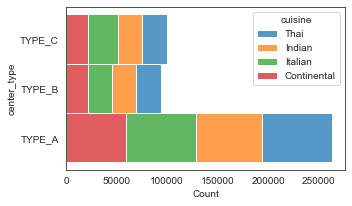

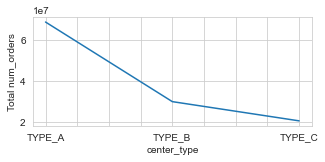

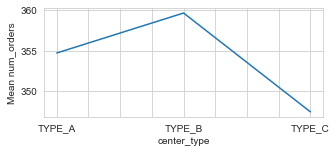

In [109]:
# Setting figure size
fig = plt.figure(figsize=(5,3))
sb.set_style("white")
# Plotting histogram for variable center_type
sb.histplot(data= df, y="center_type", hue="cuisine", multiple="stack", color="pastel", legend=True)
plt.show()
# Setting figure size
fig = plt.figure(figsize=(5,2))
sb.set_style("whitegrid")
# Plotting total number of orders for each cuisine
df.groupby(["center_type"]).num_orders.sum().plot()
plt.ylabel("Total num_orders")
plt.show()
# Setting figure size
fig = plt.figure(figsize=(5,2))
sb.set_style("whitegrid")
# Plotting mean base_price for each cuisine
df.groupby(["center_type"]).base_price.mean().plot()
plt.ylabel("Mean num_orders")
plt.show()
# The demand for all the cuisines are equally distributed in all center types.
# Even though center type A has more number of orders,
# center type B has higher meal demand in terms of average number of orders

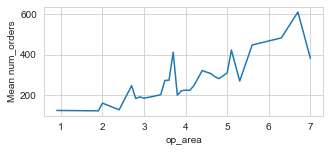

In [110]:
# Setting figure size
fig = plt.figure(figsize=(5,2))
sb.set_style("whitegrid")
# Plotting total number of orders for each op_area
df.groupby(["op_area"]).num_orders.mean().plot()
plt.ylabel("Mean num_orders")
plt.show()
# The number of orders is roughly increasing with the "op_area".

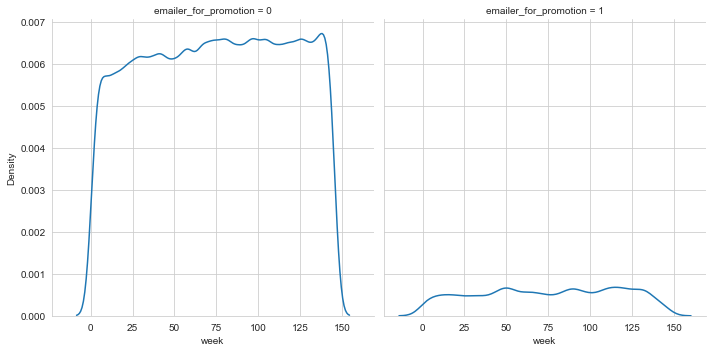

In [111]:
sb.set_style("whitegrid")
sb.displot(df, x=df["week"], col="emailer_for_promotion", kind="kde")
plt.show()
# There are very few weeks when "emailer_for_promotion" was active.

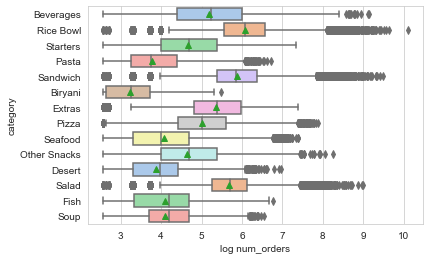

In [112]:
#Setting up the theme of figure to "white" with "grid"
sb.set_style("whitegrid")
# Plotting boxplot of features "num_orders" and "category", also showing their means indicating with a green triangle
sb.boxplot(data=df, x=np.log(df["num_orders"]), y="category", showmeans=True, palette="pastel")
plt.xlabel("log num_orders")
plt.show()
# "Biryani" and "Rice bowl" has lowest and highest average number of orders.
# Highest number of outliers in "Rice Bowl", "Sandwich" and "Salad".

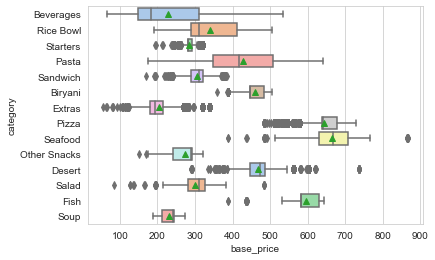

In [113]:
sb.set_style("whitegrid")
# Plotting boxplot of features "checkout_price" and "category", also showing their means indicating with a green triangle
sb.boxplot(data=df, x="base_price", y="category", showmeans=True, palette="pastel")
plt.show()
# "Extras" has the lowest average "checkout_price" while "Seafood" has the highest of all.

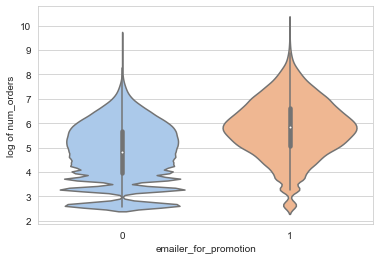

In [114]:
sb.set_style("whitegrid")
#fig = plt.figure(figsize=(10,5))
#Plotting violin plot of feature "emailer_for_promotion"
sb.violinplot(data=df, x="emailer_for_promotion", y=np.log(df["num_orders"]), showmeans=True, palette="pastel")
plt.ylabel("log of num_orders")
plt.show()
# Distribution plot shown in the violin plot is quite smooth when "emailer_for_promotion" is active(1)

<h3>Multivariate analysis</h3>

Multiple variables are analyse to give the corelation between them.

In [115]:
# Finding Spearman correlation coefficients of all the variables in dataframe using "corr" function 
df_cor = df.corr(method="spearman")
df_cor
# It displays all the coefficient in a tabular form
# Correlation is the measure of how two or more variables are related to one another.

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002262,0.002291,0.000365,0.002027,0.002788,0.002001,0.003110,-0.001623,-0.000679,-0.000587,-0.000160
week,0.002262,1.000000,-0.003542,0.018582,0.036299,0.037465,-0.000891,-0.007908,-0.008518,0.000719,0.004542,0.001190
center_id,0.002291,-0.003542,1.000000,0.009900,0.001768,-0.000052,0.013817,-0.004174,-0.054553,0.067429,0.000038,-0.087080
meal_id,0.000365,0.018582,0.009900,1.000000,-0.020744,-0.036978,0.011024,0.014221,0.030271,-0.002070,-0.002180,0.001035
checkout_price,0.002027,0.036299,0.001768,-0.020744,1.000000,0.956968,0.015693,-0.058223,-0.388101,-0.005832,-0.000636,0.023115
base_price,0.002788,0.037465,-0.000052,-0.036978,0.956968,1.000000,0.150075,0.038812,-0.343826,-0.002585,0.004244,0.019188
emailer_for_promotion,0.002001,-0.000891,0.013817,0.011024,0.015693,0.150075,1.000000,0.390534,0.211809,-0.004230,-0.007755,-0.016370
homepage_featured,0.003110,-0.007908,-0.004174,0.014221,-0.058223,0.038812,0.390534,1.000000,0.232832,0.008927,0.003423,0.037481
num_orders,-0.001623,-0.008518,-0.054553,0.030271,-0.388101,-0.343826,0.211809,0.232832,1.000000,0.025524,0.028768,0.175918
city_code,-0.000679,0.000719,0.067429,-0.002070,-0.005832,-0.002585,-0.004230,0.008927,0.025524,1.000000,0.064484,0.072627


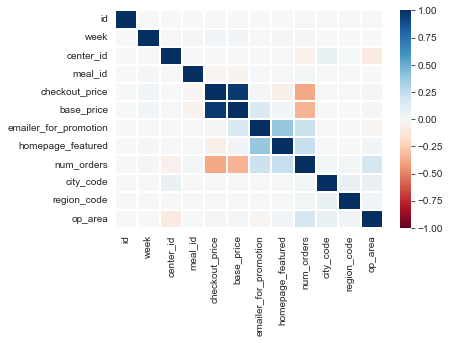

In [116]:
# Plotting correlation coefficients using "heatmap" function
sb.heatmap(df_cor, vmin=-1, vmax=1, cmap="RdBu", linewidths=0.1 ) 
plt.show()
# Blue with value 1 indicates that the two variables are linearly related.
# White with value 0 indicates that there is not relation between the two variables.
# Red with value -1 indicates that the two variables are inversely related.

<h2>Data pre-processing</h2>

Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model.

In [117]:
# As the data is a time series data
# Sorting the dataframe wrt week
df = df.sort_values(by="week")
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
284804,1409622,1,113,2444,658.63,660.63,0,0,14,Seafood,Continental,680,77,TYPE_C,4.0
285005,1203879,1,113,1525,244.50,282.33,0,0,14,Other Snacks,Thai,680,77,TYPE_C,4.0
285106,1235654,1,113,2704,242.50,280.33,0,0,121,Other Snacks,Thai,680,77,TYPE_C,4.0
43263,1393327,1,52,1248,247.35,247.35,0,0,81,Beverages,Indian,685,56,TYPE_B,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287668,1184135,145,145,1778,160.05,160.08,1,0,378,Beverages,Italian,620,77,TYPE_A,3.9
350483,1007940,145,59,1445,727.53,726.53,0,1,40,Seafood,Continental,456,56,TYPE_A,4.2
262083,1154446,145,73,1770,440.38,442.38,0,0,55,Biryani,Indian,576,34,TYPE_A,4.0
448468,1450789,145,51,2304,484.03,485.03,0,0,80,Desert,Indian,638,56,TYPE_A,7.0


In [118]:
# One hot Encoding to columns - "category", "cuisine" and "center_type"
df = pd.get_dummies(df)
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,1,0,0,1
284804,1409622,1,113,2444,658.63,660.63,0,0,14,680,...,1,0,0,1,0,0,0,0,0,1
285005,1203879,1,113,1525,244.50,282.33,0,0,14,680,...,0,0,0,0,0,0,1,0,0,1
285106,1235654,1,113,2704,242.50,280.33,0,0,121,680,...,0,0,0,0,0,0,1,0,0,1
43263,1393327,1,52,1248,247.35,247.35,0,0,81,685,...,0,0,0,0,1,0,0,0,1,0


<h3>Removing outliers</h3>
    
Quartile 1, quartile 3 and Inter-quartile region (IQR) of the dependent variable are calculated to remove the outliers.

In [119]:
# Calculating quartile1 and quartile3 of num_orders
q1 = np.percentile(np.log(df["num_orders"]),25)
q3 = np.percentile(np.log(df["num_orders"]),75)
# Calculating Inter Quartile Region
iqr = q3-q1
# Removing outliers 
df = df[np.log(df["num_orders"])>=q1-1.5*iqr]
df = df[np.log(df["num_orders"])<=q3+1.5*iqr]
df.shape

(456242, 33)

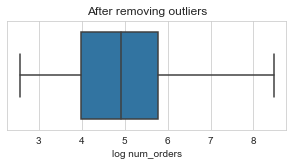

In [120]:
# Setting figure size
plt.figure(figsize=(5,2))
sb.boxplot(np.log(df["num_orders"]))
plt.title("After removing outliers")
plt.xlabel("log num_orders")
plt.show()
# Boxplot showing after removing outliers

In [121]:
# Removing outliers based on checkout_price
df = df[df["checkout_price"]<800]
df.shape

(456241, 33)

<h2>Feature Engineering</h2>
    
Feature engineering is a technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

Here we have calculated the discount percentage of each of the meal and formed a column of it.

Discount_percentage = ((base_price)-(checkout_price))*100/(base_price)

In [122]:
# Forming a discount percentage column
df["discount_percentage"] = (df["base_price"]-df["checkout_price"])*100/df["base_price"]
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,discount_percentage
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,1,0,0,1,10.151684
284804,1409622,1,113,2444,658.63,660.63,0,0,14,680,...,0,0,1,0,0,0,0,0,1,0.302741
285005,1203879,1,113,1525,244.50,282.33,0,0,14,680,...,0,0,0,0,0,1,0,0,1,13.399214
285106,1235654,1,113,2704,242.50,280.33,0,0,121,680,...,0,0,0,0,0,1,0,0,1,13.494810
43263,1393327,1,52,1248,247.35,247.35,0,0,81,685,...,0,0,0,1,0,0,0,1,0,0.000000


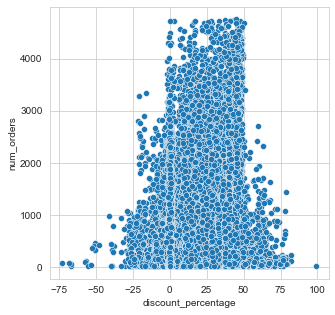

In [123]:
# Setting figure size to be plotted
fig = plt.figure(figsize=(5,5))
# Plotting scatter plot of discount_percentage and num_orders
sb.scatterplot(x=df["discount_percentage"], y=df["num_orders"], palette="muted")
plt.show()

In [134]:
df["num_orders"].describe()

count    456241.000000
mean        257.574911
std         355.363162
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max        4751.000000
Name: num_orders, dtype: float64

<AxesSubplot:xlabel='discount_percentage'>

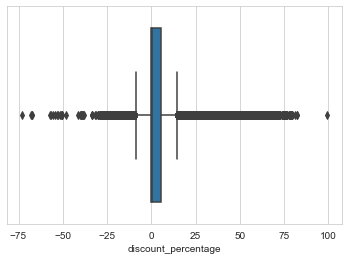

In [125]:
sb.boxplot(x=df["discount_percentage"])


We are removing the columns which are no more useful

In [70]:
# Converting all column names to lower case
df = df.rename(columns=str.lower)
# Removing column "id","checkout_price","base_price","city_code","region_code"
df = df.drop(["id","checkout_price","base_price","city_code","region_code"],axis=1)
df.shape

(367109, 29)

<h2>Model

<h3>Separating dependent variables and independent variables</h3>

In order to fit into the model data needs to be separated into dependent variables and independent variables and we need them in the form of array of values.

In [71]:
# Assigning column "num_orders" to dependent_variable
dependent_variable = "num_orders"
# Assigning the list of columns to independent_variable
independent_variable = df.columns.tolist()
# Removing dependent_variable from the list of column in independent_variable
independent_variable.remove(dependent_variable)
# Assigning the values of independent and dependent variables to x and y respectively.
x = df[independent_variable].values
y = df[dependent_variable].values

<h3>Importing required libraries

In [72]:
# Importing all the required libraries
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn import tree

<h3>Data splitting</h3>



In [73]:
# Splitting the data with TimeSeriesSplit
# Older data are assigned for training purpose and the newer data for testing
tss = TimeSeriesSplit(n_splits=5)
for i,j in tss.split(x):
    x_train, x_test = x[i], x[j]
    y_train, y_test = y[i], y[j]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((305925, 28), (61184, 28), (305925,), (61184,))

<h3>Preparing data for XGBoost</h3>

In order to feed the data into XGBoost model it has to be converted into DMatrices.

In [74]:
# Building DMatrices for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

<h3>Parameters</h3>

After extensive hyperparameter tuning we have come with the parameters that give the lowest RMSE value.

In [75]:
# Assigning parameter values
# These parameters are set after extensive hyperparameter tuning
params = {"max_depth":10,"min_child_weight": 7,"eta":0.1,"subsample": 1,"colsample_bytree": 0.7,
          "eval_metric": "rmse","objective":"reg:squarederror"}
params

{'max_depth': 10,
 'min_child_weight': 7,
 'eta': 0.1,
 'subsample': 1,
 'colsample_bytree': 0.7,
 'eval_metric': 'rmse',
 'objective': 'reg:squarederror'}

<h3>Training</h3>

We are now going to train the data with the XGBoost model for the above parameters and evaluate on the test data. We are also looking into the number rounds with which we get the lowest RMSE value; this done by making the number of boosting round to a large number assumming we'll get the best (lowest) RMSE before it stops execution. 

In [76]:
# Noting the start time of execution
s = time.time()
# Training on dtrain and evaluation is done on dtest,
# Iterating 10 more rounds after getting the minimum rmse
model = xgb.train(params,dtrain,num_boost_round=1000,evals=[(dtest, "Test")],early_stopping_rounds=10)
# Printing the time taken to execute the above code
print("Time taken:",round(time.time()-s,3),"sec")

[0]	Test-rmse:342.95459
[1]	Test-rmse:316.00970
[2]	Test-rmse:294.60773
[3]	Test-rmse:277.02795
[4]	Test-rmse:259.24557
[5]	Test-rmse:242.80255
[6]	Test-rmse:230.63866
[7]	Test-rmse:221.30054
[8]	Test-rmse:213.37375
[9]	Test-rmse:205.58627
[10]	Test-rmse:197.06151
[11]	Test-rmse:190.40037
[12]	Test-rmse:183.28250
[13]	Test-rmse:178.78194
[14]	Test-rmse:174.72208
[15]	Test-rmse:168.71845
[16]	Test-rmse:164.08711
[17]	Test-rmse:160.23309
[18]	Test-rmse:156.80333
[19]	Test-rmse:154.05453
[20]	Test-rmse:151.65565
[21]	Test-rmse:150.06602
[22]	Test-rmse:149.15308
[23]	Test-rmse:147.59404
[24]	Test-rmse:146.21050
[25]	Test-rmse:144.65006
[26]	Test-rmse:143.33716
[27]	Test-rmse:142.11333
[28]	Test-rmse:141.04190
[29]	Test-rmse:140.28284
[30]	Test-rmse:139.66116
[31]	Test-rmse:138.82779
[32]	Test-rmse:137.69367
[33]	Test-rmse:136.96626
[34]	Test-rmse:136.31386
[35]	Test-rmse:135.29065
[36]	Test-rmse:135.35854
[37]	Test-rmse:134.79573
[38]	Test-rmse:134.74910
[39]	Test-rmse:134.06006
[40]	Test-

We now get the lowest RMSE value with the number of rounds needed.

In [77]:
# Printing the minimun RMSE with its iteration
print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 128.97 in 102 rounds


This step is an optional as we are retraining the model till the number of boosting rounds we got the best RMSE. 

In [78]:
s=time.time()
# Here the number of boosting round is set to number of iteration round with minimum rmse value
# This time iteration will stop just after the minimum rmse 
# early_stopping_rounds is not needed now
num_boost_round = model.best_iteration + 1
best_model = xgb.train(params,dtrain,num_boost_round=num_boost_round,evals=[(dtest, "Test")])
print("Time taken:",round(time.time()-s,3),"sec")

[0]	Test-rmse:342.95459
[1]	Test-rmse:316.00970
[2]	Test-rmse:294.60773
[3]	Test-rmse:277.02795
[4]	Test-rmse:259.24557
[5]	Test-rmse:242.80255
[6]	Test-rmse:230.63866
[7]	Test-rmse:221.30054
[8]	Test-rmse:213.37375
[9]	Test-rmse:205.58627
[10]	Test-rmse:197.06151
[11]	Test-rmse:190.40037
[12]	Test-rmse:183.28250
[13]	Test-rmse:178.78194
[14]	Test-rmse:174.72208
[15]	Test-rmse:168.71845
[16]	Test-rmse:164.08711
[17]	Test-rmse:160.23309
[18]	Test-rmse:156.80333
[19]	Test-rmse:154.05453
[20]	Test-rmse:151.65565
[21]	Test-rmse:150.06602
[22]	Test-rmse:149.15308
[23]	Test-rmse:147.59404
[24]	Test-rmse:146.21050
[25]	Test-rmse:144.65006
[26]	Test-rmse:143.33716
[27]	Test-rmse:142.11333
[28]	Test-rmse:141.04190
[29]	Test-rmse:140.28284
[30]	Test-rmse:139.66116
[31]	Test-rmse:138.82779
[32]	Test-rmse:137.69367
[33]	Test-rmse:136.96626
[34]	Test-rmse:136.31386
[35]	Test-rmse:135.29065
[36]	Test-rmse:135.35854
[37]	Test-rmse:134.79573
[38]	Test-rmse:134.74910
[39]	Test-rmse:134.06006
[40]	Test-

<h3>Feature importance</h3>

From the 33 features we have trained the model, we want to know which feature contributes the highest weight in predicting the number of orders for a meal. This can be done with the following codes

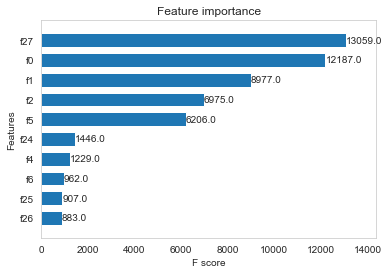

In [79]:
# Plotting feature importance plot
# Displaying only first top 10 features 
xgb.plot_importance(best_model, height=0.7, grid=False, max_num_features=10)
plt.show()

<h3>Prediction</h3>

After training the data, we now measure the error and accuracy by predicting train and test data. It is needed to compare train and test error to check whether the model is overfitting or not. As the error difference is not large, we see that the model is performing well with an accurary od 80.4% on unseen data.

In [80]:
# Calculating rmse and r2 value for train and test data
RMSE_train = round(np.sqrt(mean_squared_error(y_train,best_model.predict(dtrain))),3)
R2_train = round(r2_score(y_train,best_model.predict(dtrain)),3)

RMSE_test = round(np.sqrt(mean_squared_error(y_test,best_model.predict(dtest))),3)
R2_test = round(r2_score(y_test,best_model.predict(dtest)),3)

print("         Train         Test")
print("________________________________")
print(" RMSE:  {}      {}".format(RMSE_train, RMSE_test))
print("   R2:   {}        {}".format(R2_train, R2_test))

         Train         Test
________________________________
 RMSE:  87.542      128.975
   R2:   0.904        0.803


<h3>Plotting tree</h3>

We now want to plot the XGBoost tree form by our model. We are saving it as jpg format.

In [81]:
# Plotting XGBoost tree and saving in the form of .jpeg file
xgb.plot_tree(best_model, num_trees=0, rankdir="LR")
fig = plt.gcf()
fig.set_size_inches(100,500)
fig.savefig('tree.jpeg')

<h2>Test data</h2>

It is now time to feed the actual test.csv data into the model and predict them.

<h3>Loading data</h3>

We are now reading the test.csv file, merge meal and center file with test.csv. Pre-processed, feature engineered, dropped columns and convert into DMtarix like the way we did for train data. Then predict them with the model. 

In [45]:
# Reading test.csv file
os.chdir("D:\AAAAAAA RAJSHREE\DATA SCIENCE\DATASETs\Demand forecasting for a store")
test_data = pd.read_csv("food_demand_test.csv")
# Merging meal and center file to test_data
test_data = test_data.merge(meal, on="meal_id")
test_data = test_data.merge(center, on="center_id")
# Sorting test data by week and category
test_data = test_data.sort_values(by=["week","category"])
# Perfoming one hot encoding
test_data = pd.get_dummies(test_data)
# Calculating discount percentage and forming a column
test_data["discount_percentage"] = (test_data["base_price"]-test_data["checkout_price"])*100/test_data["base_price"]
# Dropping some of the unnecessary columns
test_data.drop(["id","checkout_price","base_price","city_code","region_code"],axis=1,inplace=True)
test_data

,week,center_id,meal_id,emailer_for_promotion,homepage_featured,op_area,category_Beverages,category_Biryani,category_Desert,category_Extras,...,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,discount_percentage
0,146,55,1885,0,0,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0.628496
9,146,55,1993,0,0,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,-0.628496
19,146,55,2539,0,0,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1.256755
22,146,55,2631,0,0,2.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0.000000
30,146,55,1248,0,0,2.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31816,155,51,2640,0,0,7.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0.000000
32041,155,51,1878,0,0,7.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,-0.313352
32304,155,61,2577,0,0,4.5,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0.312373
32314,155,61,2640,0,0,4.5,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0.000000


In [46]:
s = time.time()
# Converting into xgboost dmatrix
test_matrix = xgb.DMatrix(test_data.values)# Predicting with our best model
predicted_value = best_model.predict(test_matrix)
# Calculating time taken to to predict test data
t = round(time.time()-s,6)
print("Time taken to predict test data: {} sec".format(t))

Time taken to predict test data: 0.054834 sec


<h3>Throughput and latency</h3>

In [47]:
# Calculating throughput
# Throughput is the number of data points executed in one second 
print("Number of data points executed in one second: {}".format(int(test_data.shape[0]/t)))
# Calculating Latency
# Latency is the time taken to execute one data point
print("Time taken to execute one data point: {} sec".format(t/test_data.shape[0]))

Number of data points executed in one second: 594029
Time taken to execute one data point: 1.6834187824271636e-06 sec


<h3>Sample submission</h3>

The predicted values are then saved in the sample submission as csv file.

In [48]:
# Inserting the predicted output to sample submission file
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission["num_orders"] = predicted_value
sample_submission

,id,num_orders
0,1028232,207.194901
1,1127204,204.598083
2,1212707,128.009064
3,1082698,62.903759
4,1400926,39.255215
...,...,...
32568,1250239,204.236954
32569,1039516,126.166000
32570,1158107,121.962502
32571,1444235,242.046097


<h3>Save model</h3>

In order to use keep the model for futre use we saved the model as pickle file. To do this we import pickle and then dump the model as pickle file.

In [49]:
# Importing pickle
import pickle
# Saving the model in the form of pickle file for future prediction
pickle.dump(best_model, open("pro99_model.pkl","wb"))

<h3>Conclusion</h3>

Throughout this whole process we understood that the meal demand highly depends on the discount given on the meal, type of the meal and the location of the store; with promotions on web pages and emails make enhancement on it. 